In [1]:
import glob
import re
import pandas as pd
import numpy as np

path = 'C:/Users/aiger/Desktop/MSFE/IE517/HW4housing.csv'

In [3]:
df = pd.read_csv(path)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


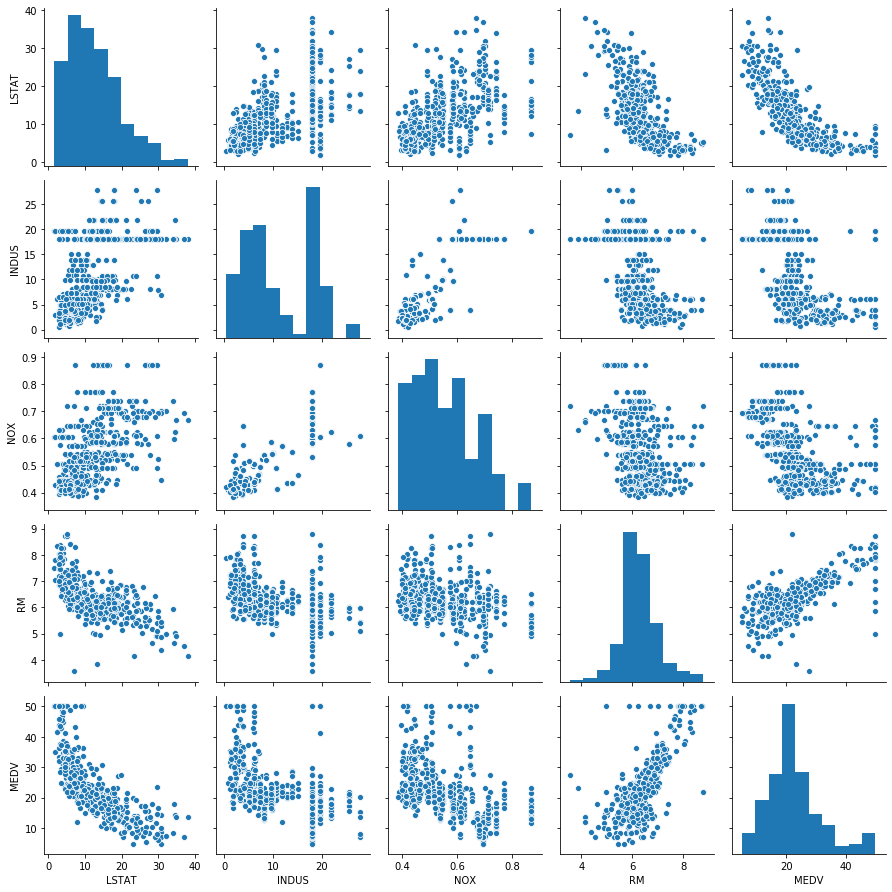

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height = 2.5)
plt.tight_layout()
plt.show()

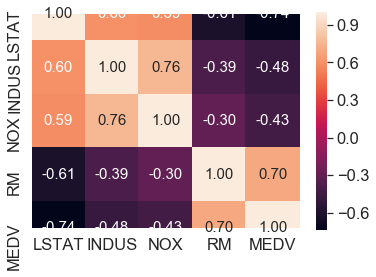

In [7]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

## Part 2: Linear Regression

### 2.1. RM vs MEDV

In [8]:
X = df[['RM']].values
y = df['MEDV'].values

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

In [12]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


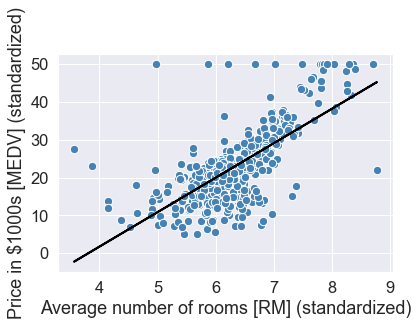

In [13]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

#### Residual errors

In [14]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

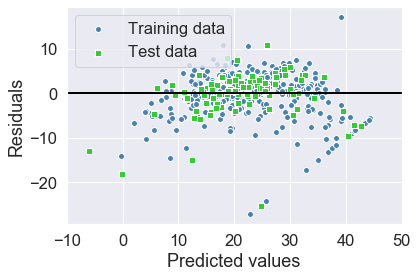

In [15]:
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Mean Squared Error (MSE) and R2

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


### 2.2. LSTAT vs MEDV

In [20]:
X = df[['LSTAT']].values
y = df['MEDV'].values

Slope: -0.950
Intercept: 34.554


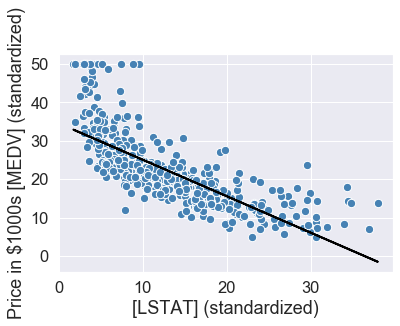

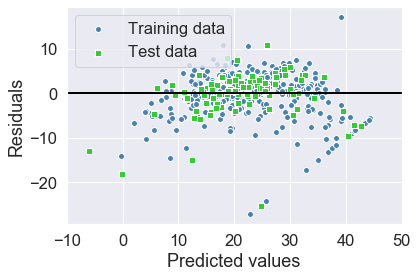

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [21]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel('[LSTAT] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

#### Residual errors

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Mean Squared Error (MSE) and R2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

### B vs MEDV

Slope: 0.034
Intercept: 10.551


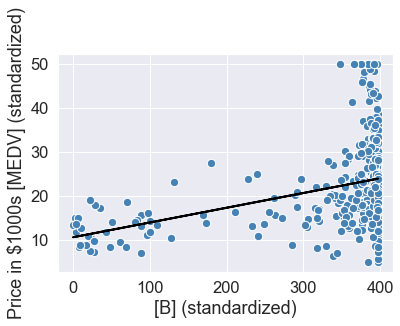

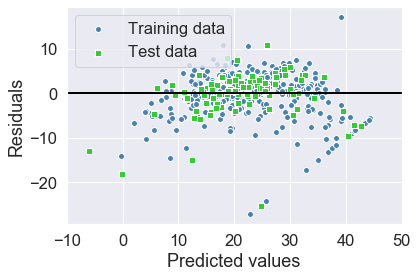

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [22]:
X = df[['B']].values
y = df['MEDV'].values

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel('[B] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

#### Residual errors

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Mean Squared Error (MSE) and R2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

### PTRATIO vs MEDV 

Slope: -2.157
Intercept: 62.345


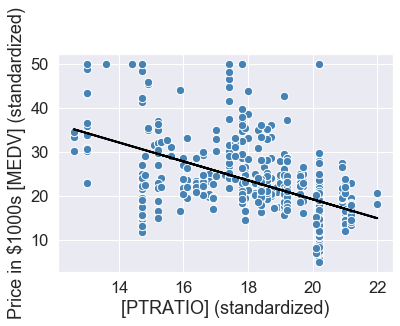

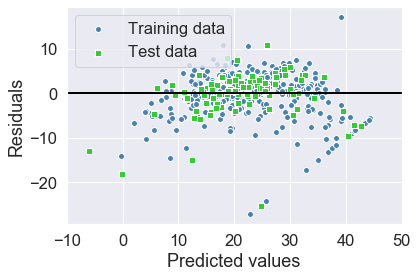

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [24]:
X = df[['PTRATIO']].values
y = df['MEDV'].values

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel('[PTRATIO] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

#### Residual errors

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Mean Squared Error (MSE) and R2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

### TAX vs MEDV 

Slope: -0.026
Intercept: 32.971


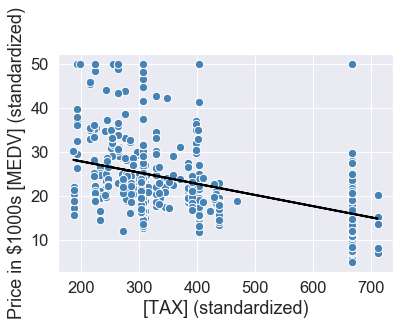

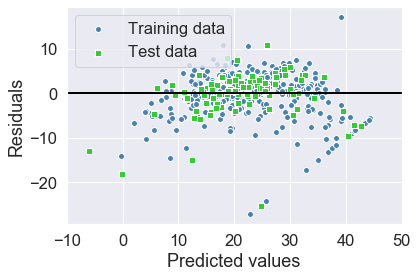

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [25]:
X = df[['TAX']].values
y = df['MEDV'].values

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel('[TAX] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

#### Residual errors

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Mean Squared Error (MSE) and R2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

### RAD vs MEDV 

Slope: -0.403
Intercept: 26.382


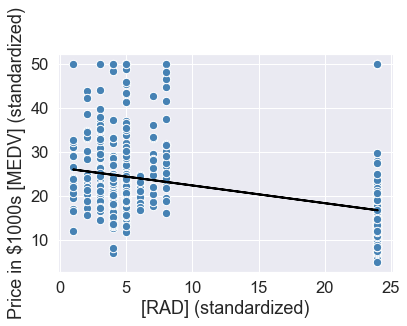

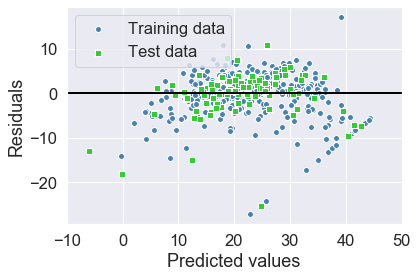

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


In [26]:
X = df[['RAD']].values
y = df['MEDV'].values

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel('[RAD] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

#### Residual errors

from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

#### Mean Squared Error (MSE) and R2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

## Part 3.1. Ridge regression 

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [44]:
print(ridge.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

[-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
MSE train: 21.824, test: 24.477
R^2 train: 0.749, test: 0.666


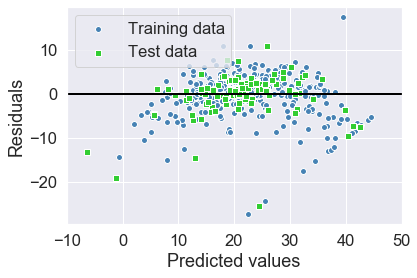

In [45]:
plt.scatter(y_train_pred, y_train_pred - y_train,
           c='steelblue', marker='o', edgecolor='white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolor='white',
           label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])
plt.show()

## 3.2. Lasso regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lasso = Lasso(alpha = 1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [42]:
print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

[-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]
MSE train: 26.417, test: 24.409
R^2 train: 0.696, test: 0.667
